In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [3]:
def get_Leiden_df(file):
    def _get_single_df(file):  
        ''' Return a pandas dataframe of time/temperatures (in K) from Leiden log file'''
        try:
            #Read the temperature columns from the log file in a pandas DataFrame. 
            #Rows 0, 1 are garbage characters. 
            #Row 4 returns the calibration files (not used here).
            df = pd.read_csv(file, skiprows=[0,1,4], index_col=['Date1'], usecols=['Date1','T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9'], sep='\t')
            
            #Add to the df columms the temperature labales
            df.columns = [df.keys(), df.iloc[0].values]
            
            #Convert the temperatures in float and express them in K
            df = df[1:].astype(float)*1e-3 
            
            #Convert the index in datetime format 
            df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H:%M:%S')
            df.index = df.index.rename('Time')

            return df
        except: 
            pass
    
    if isinstance(file, str):
        ''' If file a single element, return the dataframe '''
        df = _get_single_df(file)
        return df

    if isinstance(file, list):
        ''' If file a list of elements, return joined dataframe without duplicates '''
        df = _get_single_df(file[0])
        for _file in file[1:]:
            df = pd.concat([df, _get_single_df(_file)]).drop_duplicates()
        return df

# Example data plotting from single log file

<IPython.core.display.Javascript object>


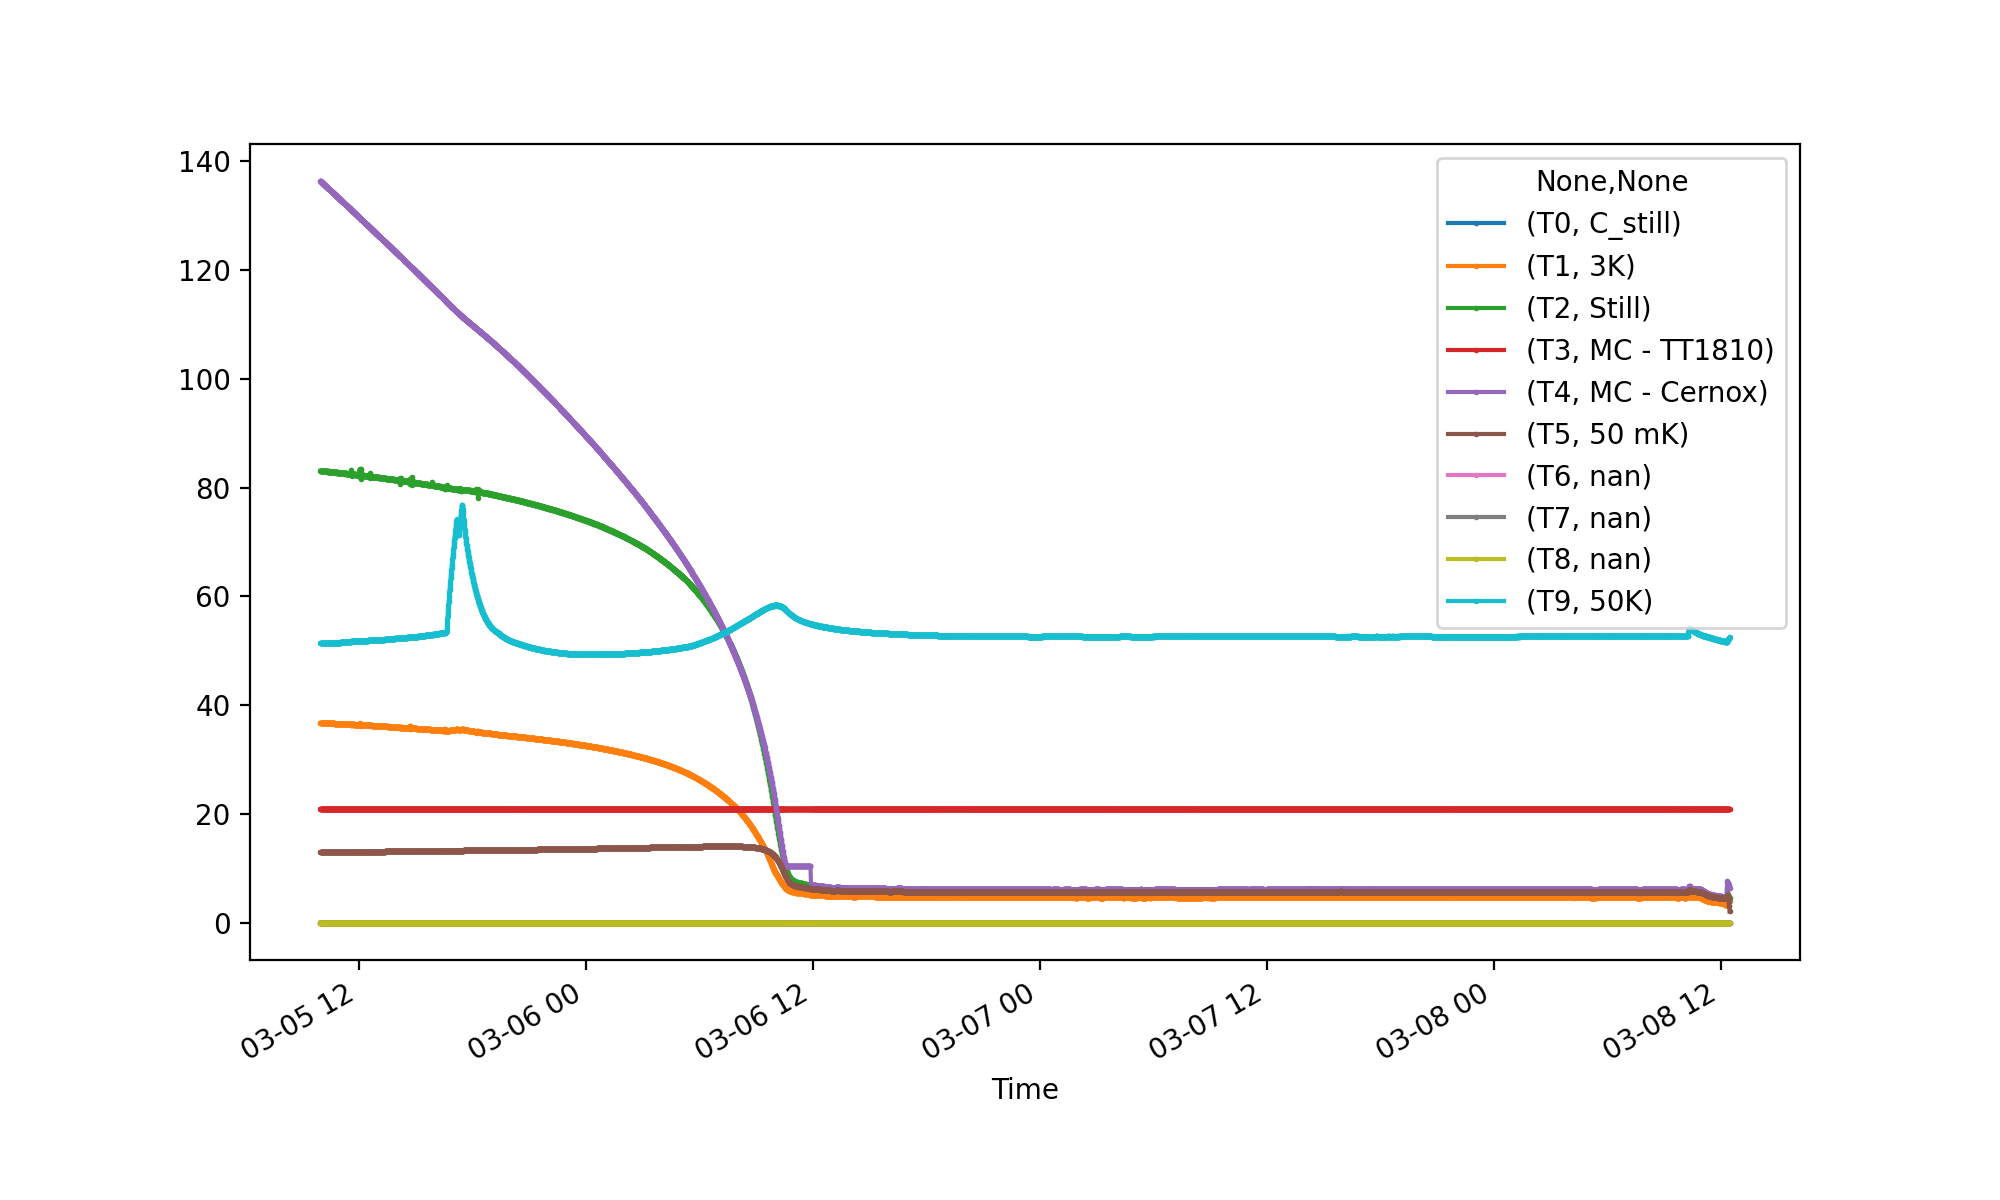

<AxesSubplot:xlabel='Time'>

In [23]:
%matplotlib notebook
get_Leiden_df('./data/LogAVS___2021-03-05-09-58-29_9.dat').plot(style='o-',figsize=(10,6), ms=1)

# Example data plotting from multiple log files

In [13]:
path = './data/'
files = glob.glob(path+"*.dat")
df = get_Leiden_df(files)

/Users/andreaiorio/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/multi.py:3587: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  uniq_tuples = lib.fast_unique_multiple([self._values, other._values], sort=sort)
/Users/andreaiorio/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (12,13,14,15,16,17,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<IPython.core.display.Javascript object>


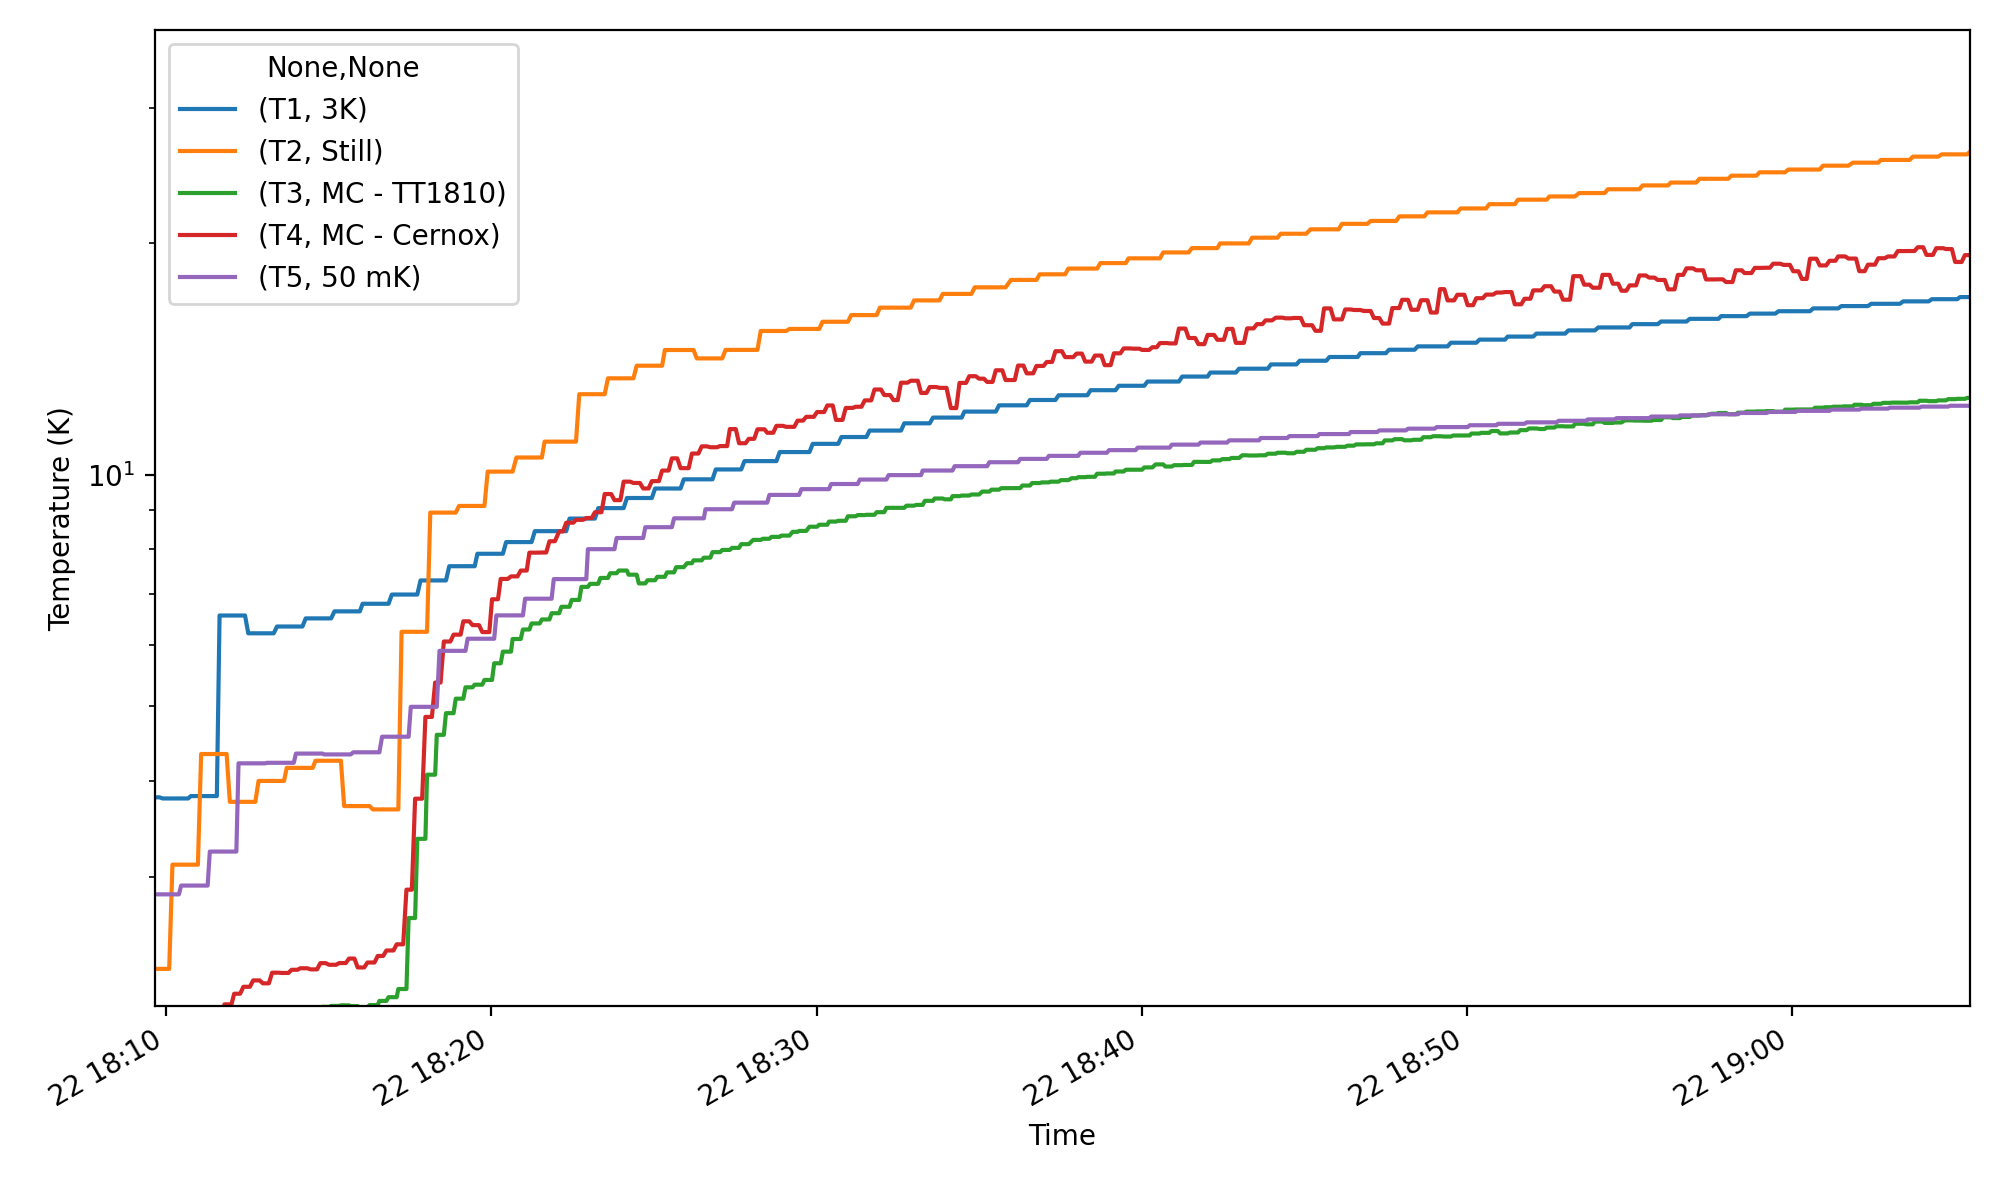

In [24]:
ax = df[['T1', 'T2', 'T3', 'T4', 'T5']].plot(figsize=(10,6))
ax.set(ylabel='Temperature (K)', yscale='log')
plt.tight_layout()

In [42]:
parser = lambda date: pd.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv('./data/LogAVS___2021-03-05-09-58-29_9.dat', skiprows=[0,1], delimiter='\t', index_col=0,  header=[0,1,2], date_parser=parser)
df
#names=["date", "time", "3K"], parse_dates=[[0, 1]], date_parser=parser)

/Users/andreaiorio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


Date1,Date2,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,T4,T5,T6,T7,T8,T9,I0,I1,I2,I3
Date(String),Date(Number),C_still,3K,Still,MC - TT1810,MC - Cernox,50 mK,Unnamed: 8_level_1,Unnamed: 9_level_1,Unnamed: 10_level_1,...,MC - Cernox,50 mK,Unnamed: 18_level_1,Unnamed: 19_level_1,Unnamed: 20_level_1,50K,Sorb3K,3K,Still,MC
,Unnamed: 1_level_2,No Calibration,RuO2-10K-NEW,RuO2 10k,TT-1810,CernoxA - mk,RuO2 1k5,No Calibration,No Calibration,No Calibration,...,CernoxA - mk,RuO2 1k5,No Calibration,No Calibration,No Calibration,PT1000,Unnamed: 22_level_2,Unnamed: 23_level_2,Unnamed: 24_level_2,Unnamed: 25_level_2
2021-03-05 09:58:38,3.697780e+09,1.756880e-10,10102.15,10107.35,1701.181,59.95926,1608.174,0.0,0.0,0.0,...,136307.308,12986.475,0.0,0.0,0.0,51390.599,20.0,0.0,0.0,0.0
2021-03-05 09:59:16,3.697780e+09,1.756752e-10,10101.92,10107.36,1701.181,59.96700,1608.193,0.0,0.0,0.0,...,136272.523,12987.057,0.0,0.0,0.0,51394.202,20.0,0.0,0.0,0.0
2021-03-05 09:59:54,3.697780e+09,1.756836e-10,10102.02,10107.47,1701.181,59.97445,1608.205,0.0,0.0,0.0,...,136239.000,12987.438,0.0,0.0,0.0,51391.438,20.0,0.0,0.0,0.0
2021-03-05 10:00:32,3.697780e+09,1.756961e-10,10102.10,10107.53,1701.181,59.98205,1608.225,0.0,0.0,0.0,...,136204.897,12988.116,0.0,0.0,0.0,51393.390,20.0,0.0,0.0,0.0
2021-03-05 10:01:09,3.697780e+09,1.756993e-10,10102.23,10107.25,1701.181,59.98971,1608.230,0.0,0.0,0.0,...,136170.458,12988.270,0.0,0.0,0.0,51397.186,20.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08 12:23:07,3.698047e+09,1.755598e-10,14616.97,16588.78,1701.181,224.13340,2202.704,0.0,0.0,0.0,...,6996.139,4359.907,0.0,0.0,0.0,52206.009,0.0,0.0,0.0,0.0
2021-03-08 12:23:45,3.698047e+09,1.755520e-10,14623.10,16622.35,1701.181,227.17700,2252.873,0.0,0.0,0.0,...,6796.875,3859.041,0.0,0.0,0.0,52259.555,0.0,0.0,0.0,0.0


<AxesSubplot:>

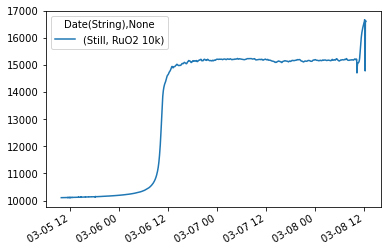

In [66]:
df['R2'].plot()